In [1]:
import scvi
import scanpy as sc
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import anndata

Global seed set to 0


In [2]:
import torch
torch.cuda.is_available()

True

In [5]:
adata_rna = sc.read_10x_mtx('../hackthon/snare_cellline/RNA/',cache=True)    

In [11]:
counts = scipy.io.mmread("../hackthon/snare_cellline/ATAC_ad/matrix.mtx").T
regions = pd.read_csv("../hackthon/snare_cellline/ATAC_ad/peaks.bed", sep='-', header=None, names=['chr','start','end'])
cells = pd.read_csv("../hackthon/snare_cellline/ATAC_ad/barcodes.tsv", header=None, names=['barcodes'])


In [14]:
adata_atac = anndata.AnnData(X=counts, obs=cells, var=regions)

/tmp/ipykernel_1159/4036944474.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_atac = anndata.AnnData(X=counts, obs=cells, var=regions)
/home/haiyi/anaconda3/envs/seacells/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [19]:
regions.head()

,chr,start,end
0,chr2,148881654,148881927
1,chr8,99495798,99496023
2,chr22,21735444,21736416
3,chr3,28241304,28242015
4,chr5,154627638,154628386


In [24]:
cells.head()
print(cells.shape)

(1047, 1)


In [22]:
counts.shape

(1047, 114679)

In [60]:
def cluster_small_multiples(adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs):
    tmp = adata.copy()

    for i,clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype('category')
        tmp.uns[clust+'_colors'] = ['#d3d3d3', adata.uns[clust_key+'_colors'][i]]

    sc.pl.umap(tmp, groups=tmp.obs[clust].cat.categories[1:].values, color=adata.obs[clust_key].cat.categories.tolist(), size=size, frameon=frameon, legend_loc=legend_loc, **kwargs)

In [ ]:
cluster_small_multiples(test, 'bulk_labels')

In [32]:
import numpy as np
# adata_multi= anndata.AnnData(X=np.array([[]]), obs=pd.DataFrame([]), var=pd.DataFrame([]))
adata_mvi = scvi.data.read_10x_multiome("../hackthon/snare_cellline")


FileNotFoundError: [Errno 2] No such file or directory: '../hackthon/snare_cellline/matrix.mtx'

In [36]:
multidata = anndata.read_h5ad("./data/Multiome_RNA_ATAC_Mouse_Brain_Alzheimers_AppNote_filtered_feature_bc_matrix.h5")

TypeError: __init__() got an unexpected keyword argument 'matrix'

In [37]:
import h5py    
import numpy as np    

feature = h5py.File("./data/Multiome_RNA_ATAC_Mouse_Brain_Alzheimers_AppNote_filtered_feature_bc_matrix.h5",'r+')    


<HDF5 file "Multiome_RNA_ATAC_Mouse_Brain_Alzheimers_AppNote_filtered_feature_bc_matrix.h5" (mode r+)>

In [96]:
feature["matrix"]["shape"][:2]

array([99200, 33459], dtype=int32)

In [283]:
feature["matrix"]["features"]['name'][:10]

array([b'Xkr4', b'Gm1992', b'Gm19938', b'Gm37381', b'Rp1', b'Sox17',
       b'Gm37587', b'Gm37323', b'Mrpl15', b'Lypla1'], dtype='|S30')

In [309]:
len(np.unique(feature["matrix"]["features"]['name']))

99160

In [312]:
feature["matrix"]["features"].keys()

<KeysViewHDF5 ['_all_tag_keys', 'feature_type', 'genome', 'id', 'interval', 'name']>

In [318]:
df = pd.DataFrame(feature["matrix"]["features"])

In [319]:
df.head()

,0
0,_all_tag_keys
1,feature_type
2,genome
3,id
4,interval


In [115]:
feature_file = feature["matrix"]["features"]

In [112]:
print(feature["matrix"]["features"]['id'][:-20])

[b'ENSMUSG00000051951' b'ENSMUSG00000089699' b'ENSMUSG00000102331' ...
 b'JH584304.1:55019-55902' b'JH584304.1:59268-60131'
 b'JH584304.1:68624-69395']


In [118]:
feature_file = feature_file[['id', "feature_type", "interval"]]

TypeError: Accessing a group is done with bytes or str,  not <class 'list'>

In [264]:
ID = feature_file['id'][:]
modality = feature_file["feature_type"][:]
interval = feature_file["interval"][:]
name = feature_file["name"][:]

In [265]:
interval

array([b'chr1:3671497-3671498', b'chr1:3466586-3466587',
       b'chr1:3658903-3658904', ..., b'GRCh38_chr21:19525386-19526282',
       b'GRCh38_chr21:25881166-25882072',
       b'GRCh38_chr21:38120690-38121587'], dtype='|S30')

In [266]:
interval = [text.decode("utf-8")  for text in interval]
interval = [text.replace(':', '\t') for text in interval]
interval = [text.replace('-', '\t') for text in interval]

In [297]:
ID = [text.decode("utf-8")  for text in ID]
modality = [text.decode("utf-8")  for text in modality]


In [269]:
interval = [text.split('\t') for text in interval]

In [272]:
interval[:10]

[['chr1', '3671497', '3671498'],
 ['chr1', '3466586', '3466587'],
 ['chr1', '3658903', '3658904'],
 ['chr1', '3985983', '3986215'],
 ['chr1', '4360313', '4409241'],
 ['chr1', '4496362', '4497354'],
 ['chr1', '4497473', '4497474'],
 ['chr1', '4586251', '4586252'],
 ['chr1', '4785709', '4785739'],
 ['chr1', '4807822', '4807911']]

In [275]:
interval_pd = pd.DataFrame(interval)

In [287]:
chro = interval_pd[[0]].to_numpy().squeeze()
start = interval_pd[[1]].to_numpy().squeeze()
end = interval_pd[[2]].to_numpy().squeeze()

In [298]:
table=np.array([ID, ID, modality, chro, start, end])
table2=table.transpose()
table2.shape

(99200, 6)

In [154]:
np.savetxt('features.tsv',table2,delimiter='\t')

TypeError: Mismatch between array dtype ('<U30') and format specifier ('%.18e	%.18e	%.18e')

In [299]:
df = pd.DataFrame(table2)

In [300]:
df.to_csv("features.tsv", header=None, index=False, sep='\t')

In [164]:
data = feature["matrix"]['data']

In [162]:
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats

In [165]:
sparse.isspmatrix(data)

False

In [166]:
data = sparse(data)

TypeError: 'module' object is not callable

In [168]:
data = feature["matrix"]

In [182]:
data.keys()

<KeysViewHDF5 ['barcodes', 'data', 'features', 'indices', 'indptr', 'shape']>

In [187]:
M1 = sparse.csc_matrix((data['data'][:],data['indices'][:], data['indptr'][:]), data['shape'][:])

In [188]:
sio.mmwrite("matrix.mtx",M1)

In [189]:
feature["matrix"]['barcodes'][:10]

array([b'AAACAGCCAAACTAAG-8', b'AAACAGCCAAGCGAGC-10',
       b'AAACAGCCAAGCGATG-9', b'AAACAGCCAATAACCT-11',
       b'AAACAGCCAATGCCCG-8', b'AAACAGCCAATTGAGA-9',
       b'AAACAGCCACAGGGAC-5', b'AAACAGCCACCTACGG-7',
       b'AAACAGCCAGCACGAA-8', b'AAACAGCCAGCACGTT-7'], dtype='|S19')

In [209]:
barcodes = [text.decode("utf-8")  for text in feature["matrix"]['barcodes'][:]]
barcodes = [text.replace('-', '_')  for text in barcodes]
barcodes = [text + '-'+text[text.find('_')+1:]  for text in barcodes]

In [210]:
barcodes = pd.DataFrame(barcodes)

In [212]:
barcodes.to_csv("data/10X_AD/barcodes.tsv", header=False, index=False)

In [211]:
barcodes.head()

,0
0,AAACAGCCAAACTAAG_8-8
1,AAACAGCCAAGCGAGC_10-10
2,AAACAGCCAAGCGATG_9-9
3,AAACAGCCAATAACCT_11-11
4,AAACAGCCAATGCCCG_8-8


In [320]:
import os
base_path = 'data/10X_AD'
features = pd.read_csv(
        os.path.join(base_path, "features.tsv"),
        sep="\t",
        header=None,
        index_col=1,
    )

In [321]:
features.head()

,0,2,3,4,5
1,,,,,
ENSMUSG00000051951,ENSMUSG00000051951,Gene Expression,chr1,3671497.0,3671498.0
ENSMUSG00000089699,ENSMUSG00000089699,Gene Expression,chr1,3466586.0,3466587.0
ENSMUSG00000102331,ENSMUSG00000102331,Gene Expression,chr1,3658903.0,3658904.0
ENSMUSG00000102343,ENSMUSG00000102343,Gene Expression,chr1,3985983.0,3986215.0
ENSMUSG00000025900,ENSMUSG00000025900,Gene Expression,chr1,4360313.0,4409241.0


In [3]:
adata_multi = scvi.data.read_10x_multiome("data/10X_AD")

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/data/_read.py:78: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(data.tocsr(), var=features, obs=cell_annot)


In [71]:
adata_multi.var.head(-10)

,ID,modality,chr,start,end
ENSMUSG00000051951,ENSMUSG00000051951,Gene Expression,chr1,3671497.0,3671498.0
ENSMUSG00000089699,ENSMUSG00000089699,Gene Expression,chr1,3466586.0,3466587.0
ENSMUSG00000102331,ENSMUSG00000102331,Gene Expression,chr1,3658903.0,3658904.0
ENSMUSG00000102343,ENSMUSG00000102343,Gene Expression,chr1,3985983.0,3986215.0
ENSMUSG00000025900,ENSMUSG00000025900,Gene Expression,chr1,4360313.0,4409241.0
...,...,...,...,...,...
GL456216.1:11129-12046,GL456216.1:11129-12046,Peaks,GL456216.1,11129.0,12046.0
GL456216.1:13409-14320,GL456216.1:13409-14320,Peaks,GL456216.1,13409.0,14320.0
GL456216.1:15773-16618,GL456216.1:15773-16618,Peaks,GL456216.1,15773.0,16618.0
GL456216.1:16767-17527,GL456216.1:16767-17527,Peaks,GL456216.1,16767.0,17527.0


In [5]:
g = adata_multi.var[adata_multi.var.modality == "Gene Expression"]

In [6]:
p = adata_multi.var[adata_multi.var.modality == "Peaks"]

In [7]:
p.shape

(66914, 5)

In [8]:
g.shape

(32286, 5)

In [9]:
adata_mvi = scvi.data.organize_multiome_anndatas(adata_multi)

In [10]:
scvi.model.MULTIVI.setup_anndata(adata_mvi, batch_key="modality")

In [11]:
vae = scvi.model.MULTIVI(adata_mvi, 32286, 66914)

In [12]:
vae.train(use_gpu=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:385: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/500:   0%|                                                | 0/500 [00:00<?, ?it/s]

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/module/_multivae.py:557: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484775609/work/aten/src/ATen/native/TensorShape.cpp:2985.)
  x = torch.where(mask_expr.T, x_expr.T, x_acc.T).T


Epoch 223/500:  45%|███▌    | 223/500 [1:32:16<1:54:37, 24.83s/it, loss=7.22e+03, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 15173.583. Signaling Trainer to stop.


In [14]:
vae.save("models/10x_ad/save")

In [ ]:
import torch

In [2]:
torch.cuda.is_available()

False

In [15]:
latent = vae.get_latent_representation()

In [16]:
adata_mvi.obsm["X_mvi"] = latent

In [18]:
sc.pp.neighbors(adata_mvi, use_rep="X_mvi")

In [21]:
adata_mvi.obsp["distances"]

<33459x33459 sparse matrix of type '<class 'numpy.float64'>'
	with 468426 stored elements in Compressed Sparse Row format>

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  

# sc.set_figure_params(figsize=(4, 4))

# for white background of figures (only for docs rendering)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

sc.tl.umap(adata_mvi, min_dist=0.3)


In [29]:
sc.tl.leiden(adata_mvi, key_added="leiden_scVI", resolution=0.5)

In [50]:
type(adata_mvi.obs['leiden_scVI'][1])

str

In [51]:
adata_mvi.obs['batch_id'] = adata_mvi.obs['batch_id'].map(str)

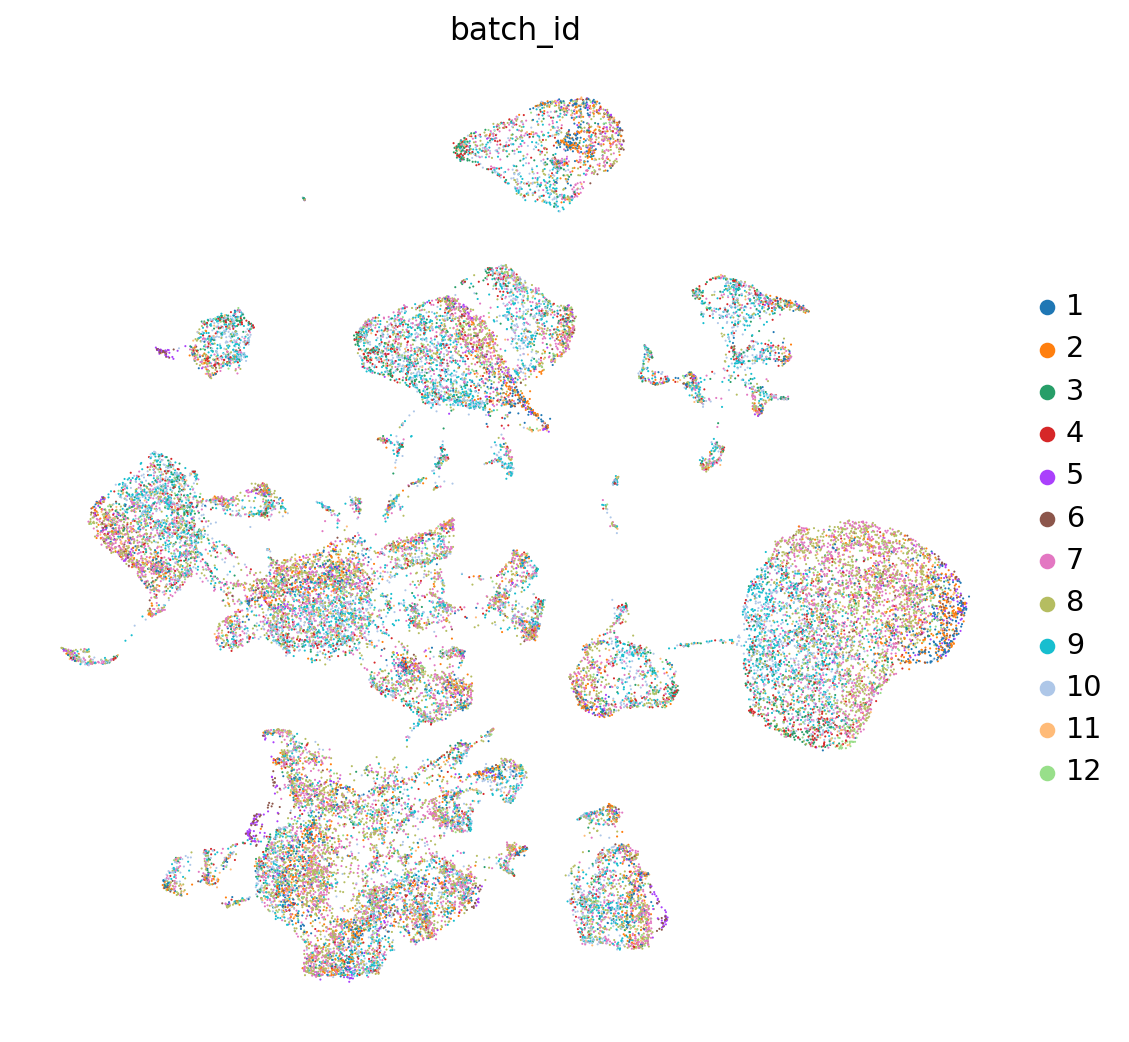

In [54]:
sc.set_figure_params(figsize=(8, 8))
sc.pl.umap(
    adata_mvi,
    color=["batch_id"],
    frameon=False,
)

In [59]:
sc.pl.scatter(
    adata_mvi,
    groups=[[c] for c in adata_mvi.obs['batch_id'].cat.categories],
    color='batch_id')

#     frameon=False,


ValueError: Either provide a `basis` or `x` and `y`.

In [69]:
adata_mvi

AnnData object with n_obs × n_vars = 33459 × 99200
    obs: 'batch_id', 'modality', '_scvi_batch', 'leiden_scVI'
    var: 'ID', 'modality', 'chr', 'start', 'end'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_scVI_colors', 'batch_id_colors'
    obsm: 'X_mvi', 'X_umap'
    obsp: 'distances', 'connectivities'

In [37]:
adata_multi.obs['batch_id'][[1]]

barcode
AAACAGCCAAGCGAGC_10    10
Name: batch_id, dtype: int64

In [66]:
def cluster_small_multiples(adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs):
    tmp = adata.copy()

    for i,clust in enumerate((adata.obs[clust_key]).unique()):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype('category')
        tmp.uns[clust+'_colors'] = ['#d3d3d3', adata.uns[clust_key+'_colors'][i]]

    sc.pl.umap(tmp, groups=tmp.obs[clust].cat.categories[1:].values, color=adata.obs[clust_key].cat.categories.tolist(), size=size, frameon=frameon, legend_loc=legend_loc, **kwargs)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scanpy/plotting/_tools/scatt

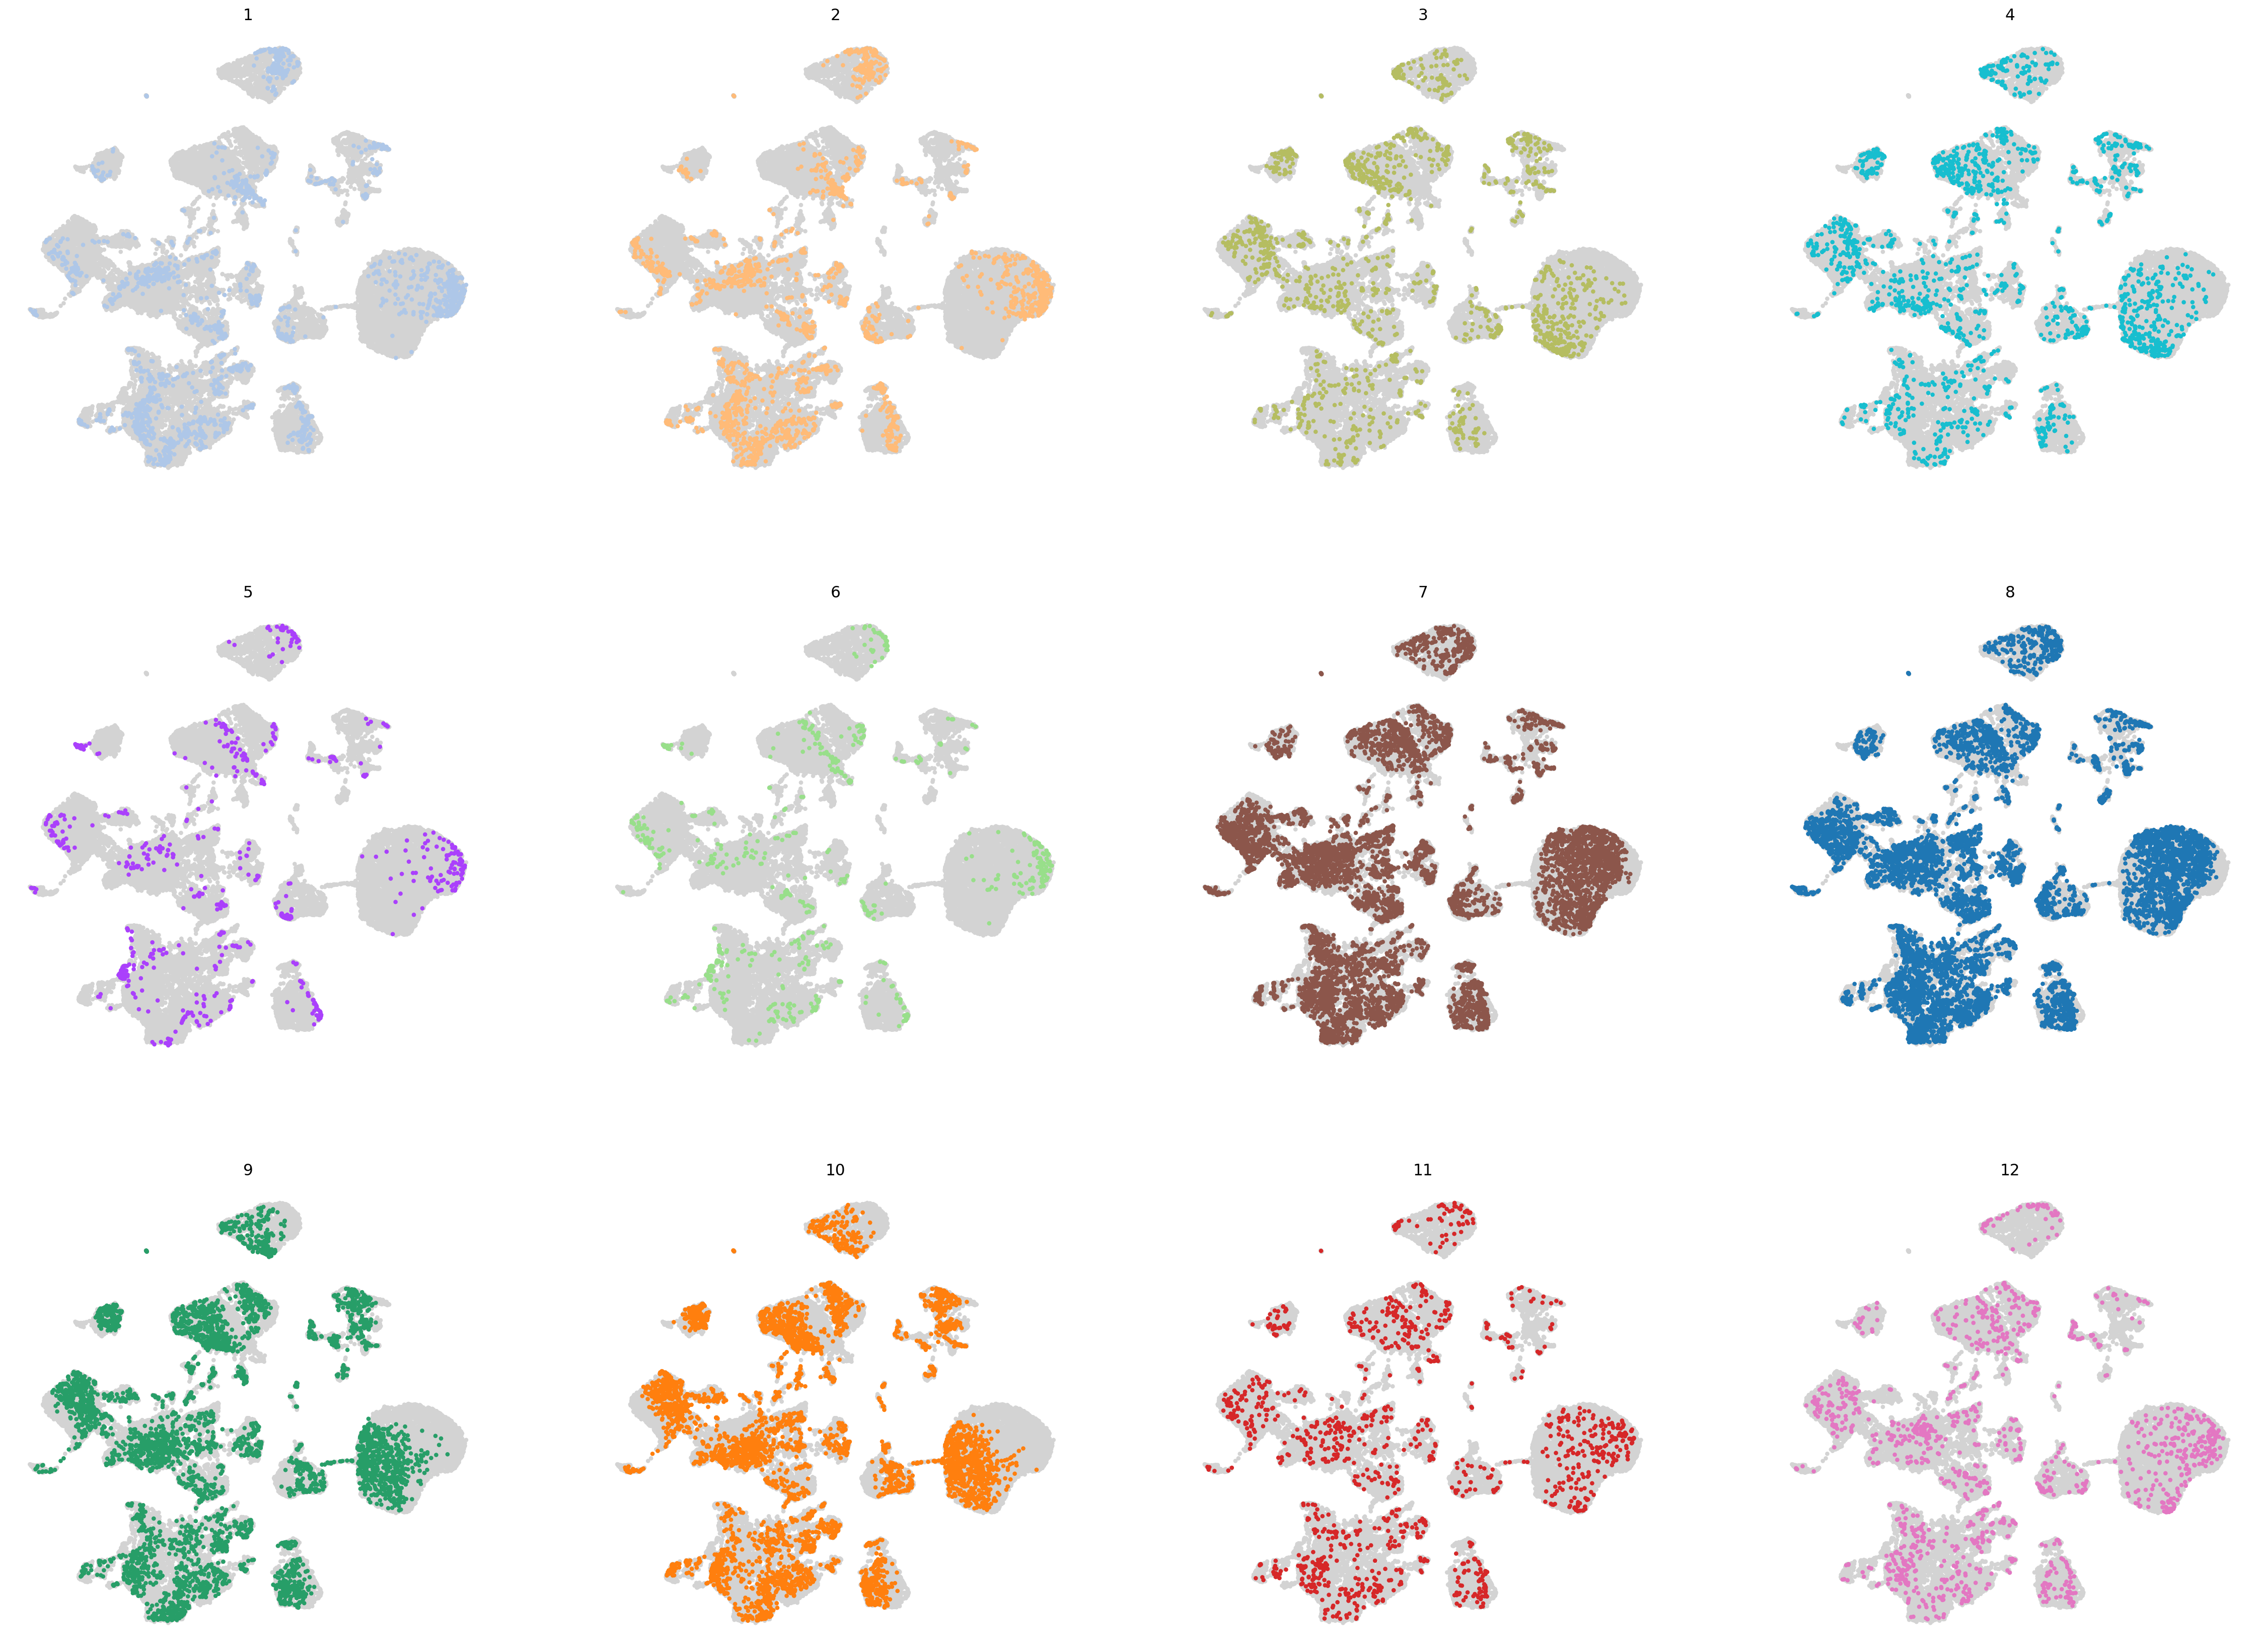

In [70]:
cluster_small_multiples(adata_mvi, 'batch_id')

In [ ]:
sc.pl.umap(adata_multi, groups=adata_multi.obs.cat.categories)